<a href="https://colab.research.google.com/github/ananduaji/Machine-Learning-Models/blob/main/Online_payment_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Online Payment Fraud Detection**
  In this project, I am analyzing the payment data to make a model to predict the payment is fraud or not. Here, I am using Random Forest algorthm to make the model.

Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# **Data**


In [3]:
df = pd.read_csv('/content/online payment Fraud detection.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
df.shape

(1186322, 11)

For making a machine learning model we don't need the money sending(nameOrig) and recieving(nameDest) account id. So we can drop those two columns. Also we don't need isFlaggedFraud column.

In [5]:
df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)

In [6]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

The 'type' column has payment types in it. It has text values in it. So we can change the values into numerical numbers. 


By taking get_dummies we get every payment type as columns. And concating it to the original data frame.

In [7]:
df_dummies = pd.get_dummies(df['type'], drop_first=True)

In [8]:
df_dummies.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [9]:
df = pd.concat([df, df_dummies], axis=1)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,0,0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,1,0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,0,0,1,0


Now we don't need 'type' column. So we can drop it.

In [10]:
df.drop(['type'], axis=1, inplace=True)

In [11]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0,0,1,0


In [12]:
df.shape

(1186322, 11)

The dataset may contain null values in it. If there is we need to remove it from the data.

In [14]:
df.isna().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
CASH_OUT          0
DEBIT             0
PAYMENT           0
TRANSFER          0
dtype: int64

In [15]:
df = df.dropna(how='any', axis=0)

In [16]:
df.isna().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
CASH_OUT          0
DEBIT             0
PAYMENT           0
TRANSFER          0
dtype: int64

In [17]:
df.shape

(1186321, 11)

In [19]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,1.186321e+06,1.186321e+06,1.186321e+06,1.186321e+06,1.186321e+06,1.186321e+06,1.186321e+06,1.186321e+06,1.186321e+06,1.186321e+06,1.186321e+06
mean,3.857302e+01,1.616762e+05,8.754000e+05,8.954901e+05,9.812116e+05,1.115171e+06,1.276214e-03,3.540534e-01,6.880094e-03,3.387102e-01,8.287302e-02
std,3.538622e+01,2.745070e+05,2.969947e+06,3.006370e+06,2.302363e+06,2.418507e+06,3.570136e-02,4.782257e-01,8.266054e-02,4.732714e-01,2.756903e-01
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.237515e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.300000e+01,7.687757e+04,1.580200e+04,0.000000e+00,1.256429e+05,2.180611e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.200000e+01,2.162486e+05,1.328110e+05,1.719784e+05,9.209185e+05,1.151312e+06,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.320000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.216916e+07,4.220740e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Now, we can split dependent and independent features

In [20]:
x = df.drop(['isFraud'], axis=1)
y = df['isFraud']
x.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0


In [21]:
y

0          0.0
1          0.0
2          1.0
3          1.0
4          0.0
          ... 
1186316    0.0
1186317    0.0
1186318    0.0
1186319    0.0
1186320    0.0
Name: isFraud, Length: 1186321, dtype: float64

In [22]:
y.value_counts()

0.0    1184807
1.0       1514
Name: isFraud, dtype: int64

# Imbalanced Data
Here, the Non fraud records are very huge as compared to the Fraud datas. This situation is called Imbalanced Data. From the below pie chart we can see the difference between the non fraud and fraud records in the dataset.

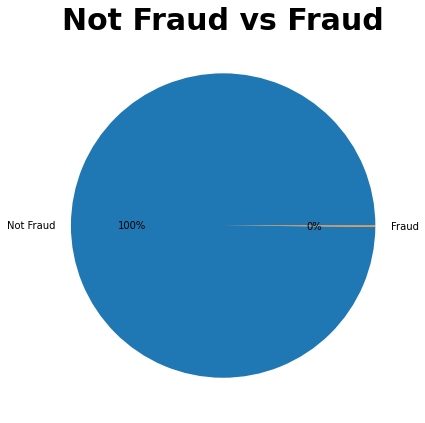

In [23]:
plt.figure(figsize=(7, 7))
plt.pie(y.value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%.0f%%')
plt.title('Not Fraud vs Fraud', fontsize=30, fontweight='bold')
plt.show()

# Dealing Imbalanced Data
From the figure above we know that the data is imbalanced. To overcome this problem there is mainly two ways:

*   Oversampling
*   Undersampling

Oversampling  - Randomly duplicate examples in the minority class.

Undersampling  - Randomly delete examples in the majority class.


here we import SMOTE from imblearn.over_sampling to overcome imbalanced data

In [25]:
from imblearn.over_sampling import SMOTE

ros = SMOTE(random_state=1, k_neighbors=5)
x_ros, y_ros = ros.fit_resample(x, y)

In [26]:
y_ros.value_counts()

0.0    1184807
1.0    1184807
Name: isFraud, dtype: int64

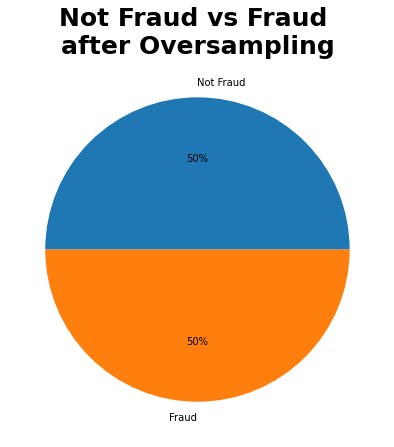

In [27]:
plt.figure(figsize=(7, 7))
plt.pie(y_ros.value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%.0f%%')
plt.title('Not Fraud vs Fraud \nafter Oversampling', fontsize=25, fontweight='bold')
plt.show()

In [28]:
x_ros.shape

(2369614, 10)

# Train Test Split
Now we can split train and test datas

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=.3, random_state=4)

In [30]:
x_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1442607,119,6.932862e+06,6.932862e+06,0.0,0.000000,0.000000e+00,0,0,0,1
1818615,73,9.540087e+06,9.540087e+06,0.0,0.000000,0.000000e+00,0,0,0,1
1524488,47,6.319197e+06,6.319197e+06,0.0,0.000000,0.000000e+00,0,0,0,1
1764932,36,4.024148e+05,4.024148e+05,0.0,0.000000,4.024148e+05,1,0,0,0
1772618,73,7.721670e+06,7.721670e+06,0.0,304272.554524,8.025943e+06,1,0,0,0


# Scaling
Here we are using min max scaler for Scaling the train-test datas

In [31]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train_minmax = minmax.fit_transform(x_train)
x_test_minmax = minmax.fit_transform(x_test)
x_train_minmax

array([[9.00763359e-01, 6.93286245e-01, 1.78042245e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.49618321e-01, 9.54008717e-01, 2.44998158e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.51145038e-01, 6.31919738e-01, 1.62282765e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [6.10687023e-02, 8.53845163e-03, 2.19275497e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.35877863e-01, 3.63190104e-03, 2.60918086e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.35877863e-01, 2.43821102e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

# Random Forest
Random Forest is the algorithm we use here to building the machine learning model.

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train_minmax, y_train)

RandomForestClassifier(n_estimators=30)

Predicting using test data

In [33]:
y_pred = model.predict(x_test_minmax)

Showing the Confusion Matrix of the predicted data

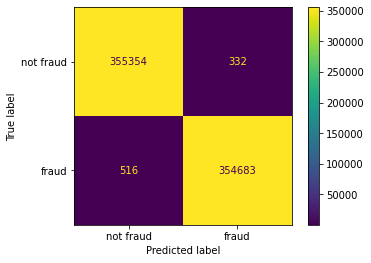

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
conf = confusion_matrix(y_test, y_pred)
conf_m = ConfusionMatrixDisplay(conf, display_labels=['not fraud', 'fraud'])
conf_m.plot()

In [35]:
class_re = classification_report(y_test, y_pred)
print(class_re) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    355686
         1.0       1.00      1.00      1.00    355199

    accuracy                           1.00    710885
   macro avg       1.00      1.00      1.00    710885
weighted avg       1.00      1.00      1.00    710885



From the above table we know that our model performs pretty well.

In [36]:
accu = accuracy_score(y_test, y_pred)
print('Accuracy:', accu)

Accuracy: 0.9988071207016606
